In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [5]:
#Create a state
class LLMState(TypedDict):

    question: str
    answer: str


In [7]:
def llm_qa(state: LLMState) -> LLMState:

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = answer

    return state

In [8]:
# create our graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

In [10]:
# execute

intial_state = {'question': 'How far is moon from the earth?'}

final_state = workflow.invoke(intial_state)

print(final_state['answer'])

The average distance from the Earth to the Moon is **384,400 kilometers (238,900 miles)**.

However, the Moon's orbit around the Earth is not perfectly circular, it's elliptical. This means the distance varies throughout the month:

*   **Perigee (closest point):** Approximately 363,104 km (225,623 miles)
*   **Apogee (farthest point):** Approximately 405,696 km (252,088 miles)

So, while the average is a good general answer, the actual distance is constantly changing.


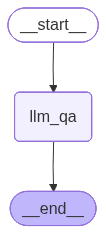

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
model.invoke('How far is moon from the earth?').content

"The Moon's distance from Earth is not constant because its orbit is elliptical, not a perfect circle.\n\nHere's a breakdown:\n\n*   **Average Distance:** Approximately **384,400 kilometers (238,900 miles)**\n*   **Closest Point (Perigee):** Approximately **363,104 kilometers (225,623 miles)**\n*   **Farthest Point (Apogee):** Approximately **405,696 kilometers (252,088 miles)**\n\nSo, when people talk about the distance to the Moon, they usually refer to the average distance."